<a href="https://colab.research.google.com/github/michellamello/mackenzie/blob/main/plpcd4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trilha 4 - Paradigmas de linguagens de programação em ciência de dados

Estudo de caso 1 - *Análise de dados de bolsa de valores*

Importação de bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

%matplotlib inline

Leitura de fonte de dados e exibição do shape (Quantidade de linhas e colunas)

In [ ]:
bovespa = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/bovespa.csv')
display(bovespa.shape)

(129, 3)

Exibição das primeiras linhas

In [ ]:
display(bovespa.head())

,data,Stock,value
0,2020-01-02,VALE3,13.45
1,2020-01-03,VALE3,13.29
2,2020-01-06,VALE3,13.14
3,2020-01-07,VALE3,13.23
4,2020-01-08,VALE3,13.22


Exibição das últimas linhas

In [ ]:
display(bovespa.tail())

,data,Stock,value
124,2020-03-03,DOLAR,4.4724
125,2020-03-04,DOLAR,4.5132
126,2020-03-05,DOLAR,4.5834
127,2020-03-06,DOLAR,4.6062
128,2020-03-09,DOLAR,4.5898


Contagem de valores por ação analisada (possibilitou checar se a quantidade é idêntica para cada ação)

In [ ]:
display(bovespa.Stock.value_counts())

VALE3    43
PETR4    43
DOLAR    43
Name: Stock, dtype: int64

Exibir quantidade de dados duplicados (possiblitou checar a possibilidade de criação de uma tabela dinâmica)

In [ ]:
display(bovespa.data.duplicated().sum())

86

Exibir maior e menor data entre as datas apresentadas na tabela

In [ ]:
display(bovespa.data.min(), bovespa.data.max())

'2020-01-02'

'2020-03-09'

Cria tabela dinâmica agrupando ações por data

In [ ]:
bovespa = pd.pivot(bovespa, columns=['Stock'], values='value', index='data').reset_index()
bovespa = bovespa.rename_axis('', axis='columns')
bovespa.head()

,data,DOLAR,PETR4,VALE3
0,2020-01-02,4.0163,16.270000,13.45
1,2020-01-03,4.0234,15.990000,13.29
2,2020-01-06,4.0570,16.219999,13.14
3,2020-01-07,4.0604,16.059999,13.23
4,2020-01-08,4.0662,15.700000,13.22


Leitura de novo arquivo de fechamento diário do IBOV e exibição de seu shape (Quantidade de linhas e colunas)

In [ ]:
IBOV = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/IBOV.csv')

display(IBOV.shape)

(43, 3)

Exibição das primeiras linhas da tabela

In [ ]:
display(IBOV.head())

,data,Stock,value
0,2020-01-02,IBOV,118573.0
1,2020-01-03,IBOV,117707.0
2,2020-01-06,IBOV,116878.0
3,2020-01-07,IBOV,116662.0
4,2020-01-08,IBOV,116247.0


Exibição de data mínima e máxima para comparação com tabela bovespa. Uma vez que as datas são idênticas, é possível incluir a nova informação na tabela dinâmica

In [ ]:
display(IBOV.data.min(), IBOV.data.max())

'2020-01-02'

'2020-03-09'

Renomeando coluna da tabela IBOV, fundindo com a tabela dinâmica criada e exibindo o resultado

In [ ]:
IBOV = IBOV.rename(columns={'value': 'IBOV'})

bovespa = pd.merge(bovespa, IBOV[['data', 'IBOV']], on='data')

display(bovespa.head())

,data,DOLAR,PETR4,VALE3,IBOV
0,2020-01-02,4.0163,16.270000,13.45,118573.0
1,2020-01-03,4.0234,15.990000,13.29,117707.0
2,2020-01-06,4.0570,16.219999,13.14,116878.0
3,2020-01-07,4.0604,16.059999,13.23,116662.0
4,2020-01-08,4.0662,15.700000,13.22,116247.0


Exibe tipos de dados da tabela bovespa, converte datas para formato datetime e exibe novamente tipos de dados para confirmar a mudança (note que formato da coluna data mudou de object para datetime64[ns])

In [ ]:
display(bovespa.dtypes)

bovespa.data = pd.to_datetime(bovespa.data, format='%Y-%m-%d', errors='coerce')

display(bovespa.dtypes)

data      object
DOLAR    float64
PETR4    float64
VALE3    float64
IBOV     float64
dtype: object

data     datetime64[ns]
DOLAR           float64
PETR4           float64
VALE3           float64
IBOV            float64
dtype: object

Verifica qualidade dos dados, exibindo soma de dados nulos. Como não foram encontrados, executada função describe para exibição de algumas estatísticas básicas. Como também não houve falha nessa última operação, significa que todos os dados estão preenchidos e são válidos

In [ ]:
display(bovespa.isnull().sum())

display(bovespa.describe())

data     0
DOLAR    0
PETR4    0
VALE3    0
IBOV     0
dtype: int64

,DOLAR,PETR4,VALE3,IBOV
count,43.000000,43.000000,43.000000,43.000000
mean,4.265325,14.243721,12.046279,113382.767442
std,0.158326,1.675228,1.287173,6520.692382
min,4.016300,7.260000,7.970000,86067.000000
25%,4.164300,14.205000,11.790000,113765.500000
50%,4.242200,14.630000,12.050000,115528.000000
75%,4.354650,14.915000,13.190000,116689.000000
max,4.606200,16.270000,13.630000,119528.000000


Exibe índice da tabela bovespa

In [ ]:
bovespa.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42],
           dtype='int64')

* Cria gráfico de linhas vazio

* Plota índice do dólar com eixo x = data e eixo y = valor da moeda
* Define título e rótulos dos eixos x e y

* Utilizando numpy, cria variável z, que utiliza valor e índice da tabela para a criação de valores de tendência. Em seguida é criada a variável p com a linha de tendência

* Plota linha de tendência resultante no gráfico

* Define formato de legenda

* Gera 5 pontos no eixo X do gráfico, definindo como rótulo de eixos alternados a data referente ao ponto

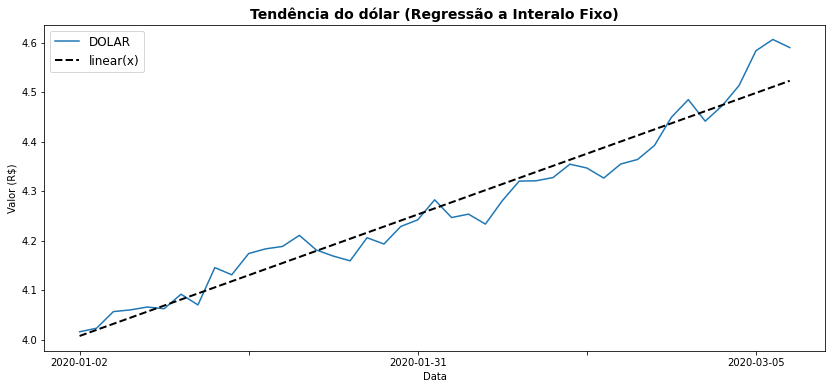

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.index, bovespa.DOLAR, label='DOLAR')
ax.set_title('Tendência do dólar (Regressão a Interalo Fixo)', fontsize=14, weight='bold')
ax.set_xlabel('Data')
ax.set_ylabel('Valor (R$)')

z = np.polyfit(bovespa.index, bovespa.DOLAR, 1)
p = np.poly1d(z)

ax.plot(bovespa.index, p(bovespa.index), linestyle='dashed', label='linear(x)', linewidth=2, color='k')

ax.legend(fontsize=12)

ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.set_xticklabels(['', bovespa.iloc[0].data.date(),'', bovespa.iloc[20].data.date(), '', bovespa.iloc[40].data.date()])
plt.show()

Realiza a mesma operação acima, com as seguintes diferenças:

* Cria uma regressão a intervalor variável, que elimina as distorções causadas pelos finais de semana ao gráfico (distorções que existem devido ao fato de a bolsa de valores funcionar apenas em dias úteis)
* Exibe os rótulos de data em cada um dos 5 pontos do eixo X do gráfico

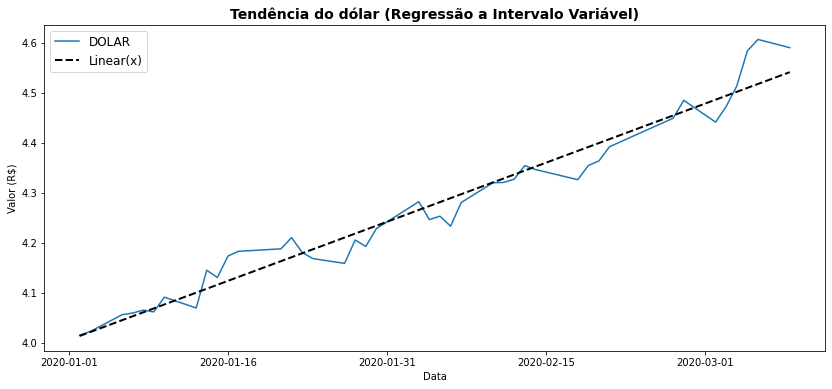

In [ ]:
bovespa['dias'] = bovespa['data'] - bovespa['data'].min()

fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.data, bovespa.DOLAR, label='DOLAR')

ax.set_title('Tendência do dólar (Regressão a Intervalo Variável)', fontsize=14, weight='bold')
ax.set_xlabel('Data')
ax.set_ylabel('Valor (R$)')

z = np.polyfit(bovespa.dias.dt.days, bovespa.DOLAR, 1)
p = np.poly1d(z)
ax.plot(bovespa.data, p(bovespa.dias.dt.days), linestyle='dashed', label='Linear(x)', linewidth=2, color='k')

ax.legend(fontsize=12)

ax.xaxis.set_major_locator(ticker.MaxNLocator(5))

plt.show()

Cria no dataframe uma coluna para a exibição das semanas, valor este que é obtido através da função **dt.isocalendar().week** e exibe os dados para conferência

In [ ]:
bovespa['week'] = bovespa['data'].dt.isocalendar().week

bovespa.head()

,data,DOLAR,PETR4,VALE3,IBOV,dias,week
0,2020-01-02,4.0163,16.270000,13.45,118573.0,0 days,1
1,2020-01-03,4.0234,15.990000,13.29,117707.0,1 days,1
2,2020-01-06,4.0570,16.219999,13.14,116878.0,4 days,2
3,2020-01-07,4.0604,16.059999,13.23,116662.0,5 days,2
4,2020-01-08,4.0662,15.700000,13.22,116247.0,6 days,2


* Obtém desvio padrão e médias semanais e as insere em lista mensal

* Transfere listas para arrays NumPy

* Plota gráfico errorbar onde a linha é obtida da média mensal e em cada ponto, é inserido o desvio padrão do período

* Plota gráfico scatter onde em cada ponto do gráfico anterior, são exibidos como pontos os valores semanais da cotação IBOV

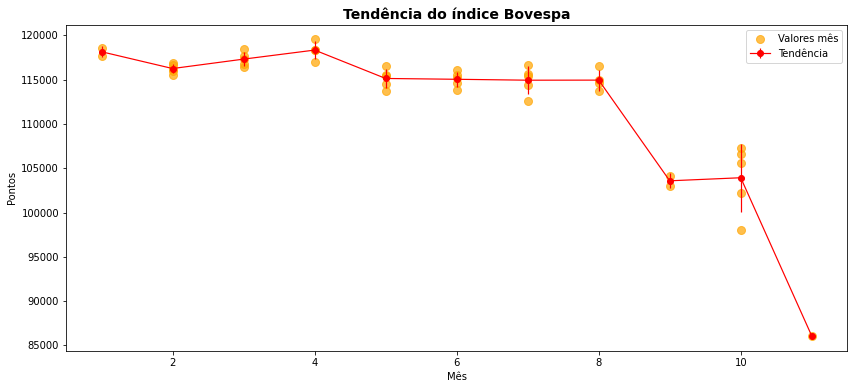

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))

yerr = []
ymean = []

for w in bovespa.week.unique():
  yerr.append(bovespa[bovespa.week == w]['IBOV'].std())
  ymean.append(bovespa[bovespa.week == w]['IBOV'].mean())

yerr = np.array(yerr)
ymean = np.array(ymean)

plt.errorbar(bovespa.week.unique(), ymean, yerr=yerr, label='Tendência', marker='o', color='r', linewidth=1.2)
plt.scatter(bovespa.week, bovespa.IBOV, label='Valores mês', marker='o', color='orange', alpha=0.7, s=64)

plt.title('Tendência do índice Bovespa', fontsize=14, weight='bold')
plt.xlabel('Mês')
plt.ylabel('Pontos')
plt.legend()

plt.show()

Cria gráfico idêntico ao anterior, com a diferença de, ao invés de utilizar o tipo gráfico errorbar para demonstrar o desvio padrão, utiliza boxplot (visualização usual do mercado financeiro)que possibilita a visualização de máximos e mínimos

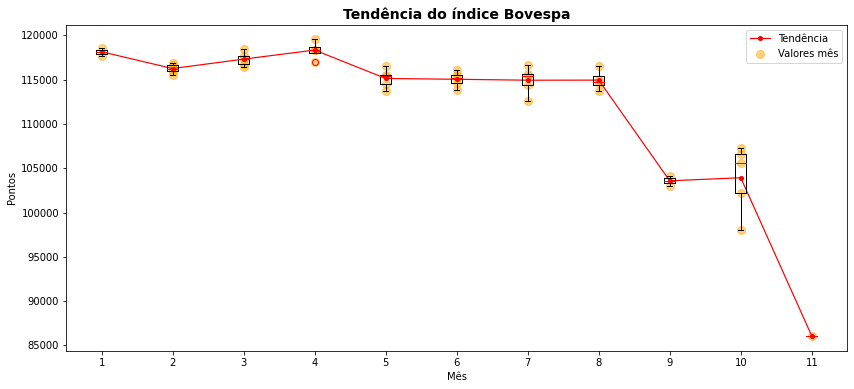

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

plt.plot(np.array(bovespa.week.unique()), ymean, 'r-', label='Tendência', marker='o', linewidth=1.2, markersize=4)
plt.scatter(bovespa.week, bovespa.IBOV, label='Valores mês', marker='o', alpha=0.5, s=64, color='orange')

for week in bovespa.week.unique():
  plt.boxplot(bovespa[bovespa.week == week].IBOV, positions=[week], widths=0.15, flierprops=dict(color='r', markeredgecolor='r'), medianprops=dict(color='r'))

plt.title('Tendência do índice Bovespa', fontsize=14, weight='bold')
plt.xlabel('Mês')
plt.ylabel('Pontos')
plt.legend()

plt.show()

Combina gráficos IBOV e DOLAR utilizando dois eixos X diferentes

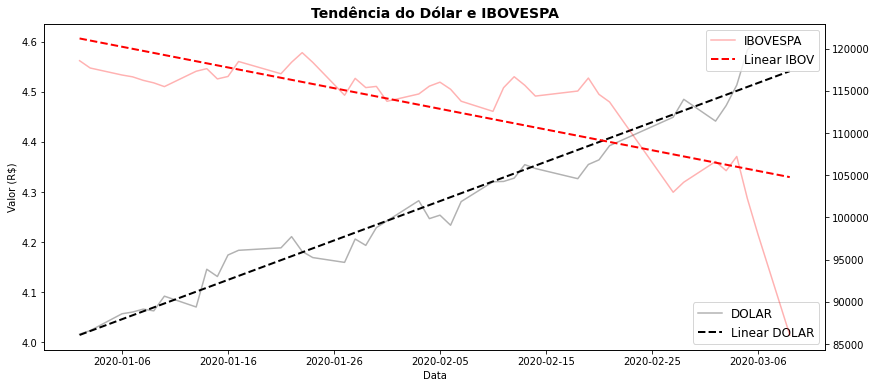

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.data, bovespa.DOLAR, label='DOLAR', color='k', alpha=0.3)

ax2 = ax.twinx()

ax2.plot(bovespa.data, bovespa.IBOV, label='IBOVESPA', color='r', alpha=0.3)

ax.set_title('Tendência do Dólar e IBOVESPA', fontsize=14, weight='bold')
ax.set_xlabel('Data')
ax.set_ylabel('Valor (R$)')
ax2.set_xlabel('Pontos')

z = np.polyfit(bovespa.dias.dt.days,bovespa.DOLAR, 1)
p = np.poly1d(z)
ax.plot(bovespa.data, p(bovespa.dias.dt.days), linestyle='dashed', label='Linear DOLAR', linewidth=2, color='k')

z = np.polyfit(bovespa.dias.dt.days, bovespa.IBOV, 1)
p = np.poly1d(z)
ax2.plot(bovespa.data, p(bovespa.dias.dt.days), linestyle='dashed', label='Linear IBOV', linewidth=2, color='r')

ax.legend(loc='lower right', fontsize=12)
ax2.legend(fontsize=12)

ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()

Para a comparação de mais de dois dados em um mesmo gráfico, é preciso normalizá-los através da fórmula:

normalização = (dado - media(dado)) / desvio padrão(dado)

O trecho abaixo normaliza os valores, os concatena ao dataframe e os exibe para conferência

In [ ]:
bovespa_norm = (bovespa.drop(columns=['data', 'dias', 'week']) - bovespa.drop(columns=['data', 'dias', 'week']).mean()) / bovespa.drop(columns=['data', 'dias', 'week']).std()
bovespa_norm = pd.concat([bovespa[['data', 'dias', 'week']], bovespa_norm], axis=1)

bovespa_norm.head()


,data,dias,week,DOLAR,PETR4,VALE3,IBOV
0,2020-01-02,0 days,1,-1.572860,1.209554,1.090545,0.795963
1,2020-01-03,1 days,1,-1.528018,1.042412,0.966242,0.663155
2,2020-01-06,4 days,2,-1.315796,1.179707,0.849708,0.536022
3,2020-01-07,5 days,2,-1.294322,1.084198,0.919628,0.502896
4,2020-01-08,6 days,2,-1.257690,0.869302,0.911860,0.439253


Com a normalização dos dados, plota resultados em gráfico de linhas com linha vertical em 20/02/2020, quando se iniciou a pandemia de COVID-19

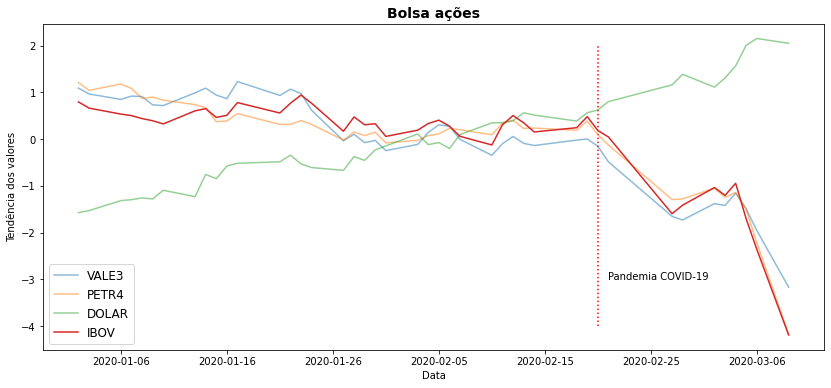

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa_norm.data, bovespa_norm.VALE3, label='VALE3', alpha=0.5)
ax.plot(bovespa_norm.data, bovespa_norm.PETR4, label='PETR4', alpha=0.5)
ax.plot(bovespa_norm.data, bovespa_norm.DOLAR, label='DOLAR', alpha=0.5)
ax.plot(bovespa_norm.data, bovespa_norm.IBOV, label='IBOV')

ax.set_title('Bolsa ações', fontsize=14, weight='bold')
ax.set_xlabel('Data')
ax.set_ylabel('Tendência dos valores')

ax.legend(fontsize=12)

plt.vlines(np.datetime64('2020-02-20'), -4, 2, color='r', linestyles=':')
plt.text(np.datetime64('2020-02-21'), -3, 'Pandemia COVID-19')

ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()